In [131]:
import numpy as np
import pandas as  pd
from matplotlib import pyplot as plt
import seaborn as sns


step 1: Load and explore the dataset

In [50]:
dt=pd.read_csv("googleplaystore.csv")
print(df)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

In [51]:
dt.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [52]:
dt.sample(10)  #random select in dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1563,metroZONE,LIFESTYLE,4.1,47497,34M,"10,000,000+",Free,0,Everyone,Lifestyle,"June 8, 2018",5.3.0.54.7,5.0 and up
8820,DS Creator 2.0,TOOLS,1.0,2,4.4M,500+,Free,0,Everyone,Tools,"March 23, 2018",2.0.180226.1,4.0 and up
3910,My Talking Angela,FAMILY,4.5,9876369,99M,"100,000,000+",Free,0,Everyone,Casual,"July 3, 2018",3.7.2.51,4.1 and up
6892,Evolution: Battle for Utopia,FAMILY,4.2,246705,27M,"1,000,000+",Free,0,Teen,Strategy,"May 4, 2018",3.5.2,4.0.3 and up
7656,Soo Co-op Mobile Banking,FINANCE,4.5,159,14M,"1,000+",Free,0,Everyone,Finance,"September 12, 2017",4.2.87,4.0.3 and up
7875,CT MyChiroTown Mobile,MEDICAL,3.9,40,4.0M,"5,000+",Free,0,Everyone,Medical,"July 7, 2015",4.1.0,2.3.3 and up
4536,Offroad Pickup Truck R,FAMILY,4.4,6367,96M,"1,000,000+",Free,0,Everyone,Simulation,"July 14, 2017",1.4,2.3 and up
934,STARZ,ENTERTAINMENT,4.3,88185,Varies with device,"10,000,000+",Free,0,Mature 17+,Entertainment,"June 20, 2018",Varies with device,Varies with device
2340,Pill Identifier and Drug list,MEDICAL,4.0,488,17M,"100,000+",Free,0,Everyone,Medical,"August 1, 2018",3.8,4.1 and up
8235,DB for Fallout Shelter,FAMILY,4.0,3323,47M,"100,000+",Free,0,Everyone,Simulation,"March 29, 2018",1.9,4.0 and up


In [53]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# step 2 Data cleaning
1.covert data types for better analysis
2.Handle missing values
3.Remove duplicates
4.Detect Outliers and Remove them

1.covert data types for better analysis

In [54]:
#price
dt["Price"]= dt["Price"] . astype(str).str.replace("Everyone","0")
dt["Price"]= dt["Price"].astype(str).str.replace(r"[^\d.]", "",regex=True)
dt["Price"] =pd.to_numeric(dt["Price"],errors='coerce')


In [55]:
#install
dt["Installs"] = dataset["Installs"].str.replace("free", "0")
dt["Installs"]= dt["Installs"].str.replace(r"[+,]","",regex=True)
dt["Installs"]=pd.to_numeric(dt["Installs"],errors='coerce')

In [59]:
dt["Last Updated"]=pd.to_datetime(dt["Last Updated"],errors="coerce")

In [127]:
print(dt.dtypes)

App                       object
Category                  object
Rating                   float64
Reviews                   object
Size                      object
Installs                 float64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object


In [128]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          10357 non-null  float64       
 3   Reviews         10357 non-null  object        
 4   Size            10357 non-null  object        
 5   Installs        10357 non-null  float64       
 6   Type            10357 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10357 non-null  object        
 12  Android Ver     10357 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 1.1+ MB


2.Handle missing values

In [61]:
dt.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             1
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

In [76]:
dt["Rating"].fillna(dt["Rating"].median(),inplace=True)

In [77]:
dt["Type"].fillna(dt["Type"].mode()[0], inplace=True)


In [78]:
dt["Content Rating"].fillna(dt["Content Rating"].mode()[0],inplace=True)


In [79]:
dt["Current Ver"].fillna(dt["Current Ver"].mode()[0],inplace=True)

In [80]:
dt["Android Ver"].fillna(dt["Android Ver"].mode()[0],inplace=True)

In [81]:
dt["Last Updated"].fillna(dt["Last Updated"].mode()[0],inplace=True)

In [82]:
dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  object        
 4   Size            10841 non-null  object        
 5   Installs        10840 non-null  float64       
 6   Type            10841 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10841 non-null  object        
 12  Android Ver     10841 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 1.1+ MB


In [84]:
dt.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          1
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

3.Remove duplicates

In [89]:
dt.duplicated().sum()

0

In [88]:
dt=dt.drop_duplicates(keep='first')

4.Detect Outliers and Remove them

In [91]:
dt.describe()

,Rating,Installs,Price
count,10358.000000,1.035700e+04,10358.000000
mean,4.205165,1.415776e+07,1.030701
std,0.506868,8.023955e+07,16.277843
min,1.000000,0.000000e+00,0.000000
25%,4.100000,1.000000e+03,0.000000
50%,4.300000,1.000000e+05,0.000000
75%,4.500000,1.000000e+06,0.000000
max,19.000000,1.000000e+09,400.000000


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


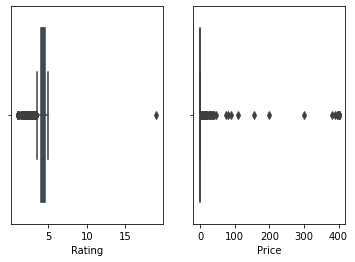

In [94]:
plt.subplot(1,2,1)
sns.boxplot(dt['Rating'])
plt.subplot(1,2,2)
sns.boxplot(dt["Price"])
plt.show()

# Lets understand and handle RATING column first for Outlier detection

In [95]:
(dt["Rating"]>5).sum() # only one value is greater than 5 and its outlier ,we will remove it

1

In [96]:
dt=dt[dt["Rating"]<=5]

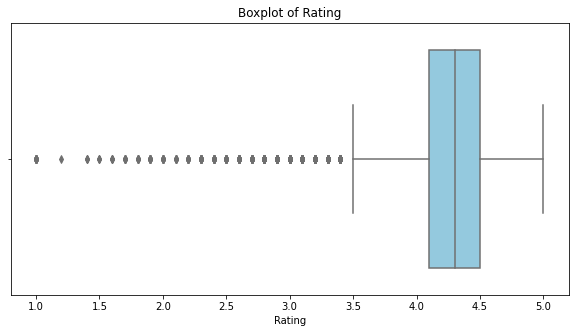

In [103]:

plt.figure(figsize=(10,5))
sns.boxplot(x=dt["Rating"],color="skyblue")
plt.title("Boxplot of Rating")
plt.show()

In [100]:
##Capping if price column outliers using  percentile method

In [102]:
upper_limit=dt["Price"].quantile(0.95) #set upper limit at 95th percentile
upper_limit

1.99

In [105]:
dt["Price"]=dt["Price"].clip(upper=upper_limit)#cap value above 95th percentile

C:\Users\user\AppData\Local\Temp\ipykernel_23456\1325210236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["Price"]=dt["Price"].clip(upper=upper_limit)#caping


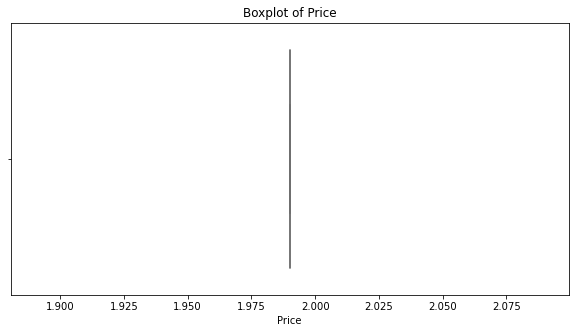

In [106]:
plt.figure(figsize=(10,5))
sns.boxplot(x=dt["Price"],color="skyblue")
plt.title("Boxplot of Price")
plt.show()

# 3.Buisness Questions for Analysis

Q.1 what is the averge rating of apps on the play store(non-graphical)

In [109]:
avg_rating=dt["Rating"].mean()
print(f"average rating of apps on the Play Store :{avg_rating:.2f}")

average rating of apps on the Play Store :4.20


Q.2 What percentage of apps are free vs paid.

In [113]:
total_apps= dt.shape[0]
free_apps=dt[dt["Type"] == "Free"].shape[0]
paid_apps=dt[dt["Type"] == "Paid"].shape[0]
free_apps_percentage=(free_apps/total_apps)*100
paid_apps_percentage=(paid_apps/total_apps)*100

print(f"Free Apps Percentage:{free_apps_percentage:.2f}%")
print(f"Paid Apps percentage:{paid_apps_percentage:.2f}%")

Free Apps Percentage:92.61%
Paid Apps percentage:7.39%


In [ ]:
3.What is the most common app category.

In [118]:
most_common_app_cat= dt["Category"].value_counts()
most_common_app_cat

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [119]:
most_common_app_cat_name= dt["Category"].value_counts().idxmax()
print(f"most_common_app_cat:{most_common_app_cat_name}")


most_common_app_cat:FAMILY


Q.4 Which app category has the highest number of apps?(categorical variables)

Text(0, 0.5, 'number of apps')

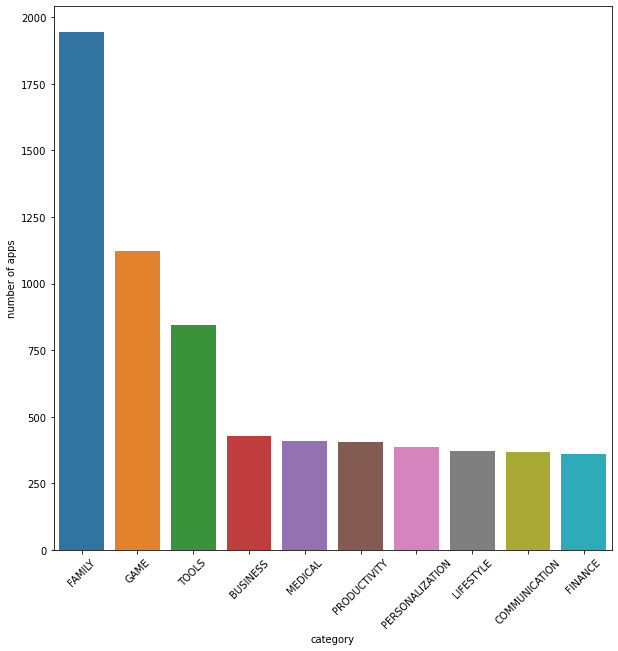

In [133]:
most_common_app_cat = dt["Category"].value_counts().head(10)#top ten name 
plt.figure(figsize=(10,10))
sns.barplot(x=most_common_app_cat.index,y=most_common_app_cat.values)
plt.xticks(rotation=45)
plt.xlabel("category")
plt.ylabel("number of apps")

Q.5 WHAT IS  THE distribution of content ratings?

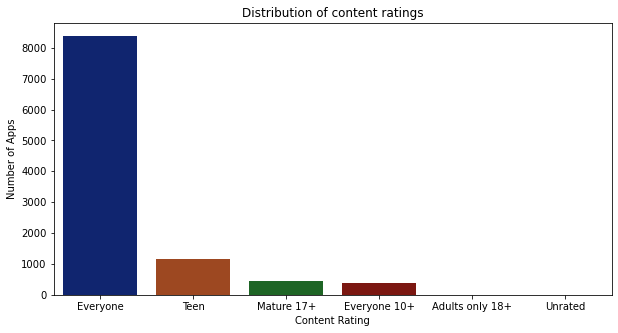

In [181]:
content_Rating =dt["Content Rating"].value_counts()# for counts 
plt.figure(figsize=(10,5))
sns.barplot(x=content_Rating.index ,y=content_Rating.values ,palette='dark')
plt.xlabel("Content Rating")
plt.title("Distribution of content ratings")
plt.ylabel("Number of Apps")
plt.show()#rating is the most common

6. How many apps belong to the 5 most popular categories?

Text(0, 0.5, 'number of apps')

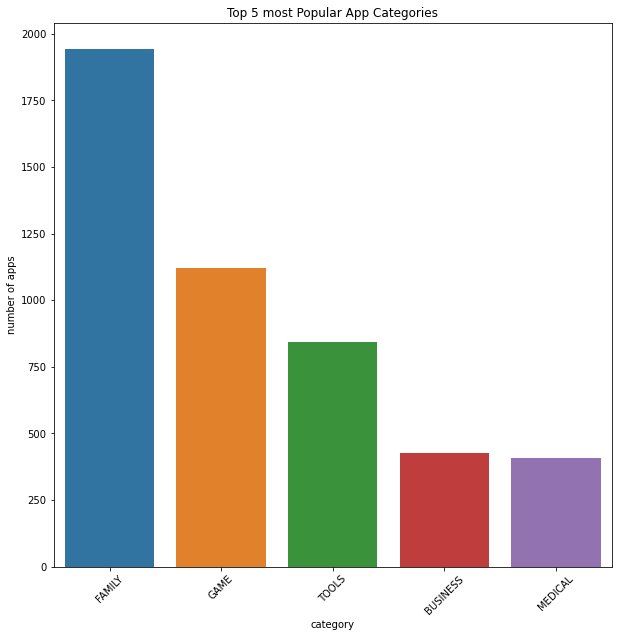

In [182]:
most_common_app_cat = dt["Category"].value_counts().head(5)#top ten name 
plt.figure(figsize=(10,10))
sns.barplot(x=most_common_app_cat.index,y=most_common_app_cat.values)
plt.xticks(rotation=45)
plt.title("Top 5 most Popular App Categories")
plt.xlabel("category")
plt.ylabel("number of apps")

Q.7 What is the most common rating given to apps?(Numerical variables)

Text(0.5, 1.0, 'Most Common rating given to apps')

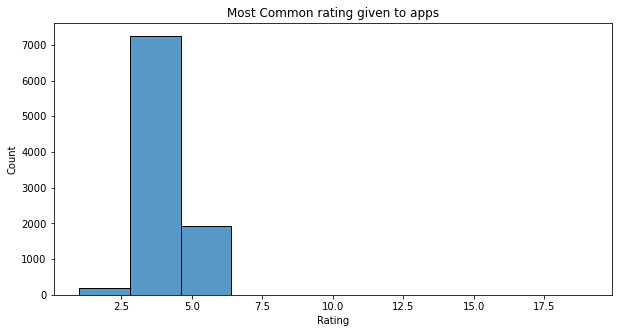

In [145]:
plt.figure(figsize=(10,5))
sns.histplot(dataset['Rating'],bins=10)
plt.title("Most Common rating given to apps")

Q.8 How are app prices distributed?

<function matplotlib.pyplot.show(close=None, block=None)>

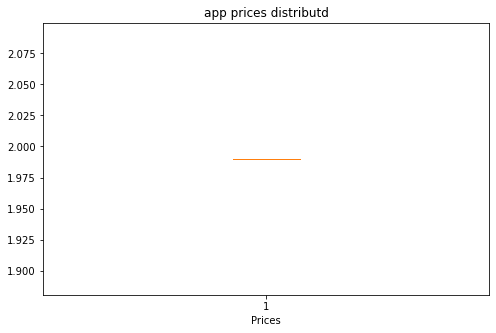

In [150]:
plt.figure(figsize=(8,5))
plt.boxplot(dt["Price"])
plt.title("app prices distributd")
plt.xlabel("Prices")
plt.show

Q.9 Do free apps have better  ratings than paid apps?(Numerical vs CAtegorical)

In [158]:
free_apps_avg_rating=dt[dt["Type"]=="Free"]["Rating"].mean()
paid_apps_avg_rating=dt[dt["Type"]=="Paid"]["Rating"].mean()
print(f"Averge Rating for free Apps:{free_apps_avg_rating:.2f}")
print(f"Averge Rating For Paid Apps:{free_apps_avg_rating:.2f}")

Averge Rating for free Apps:4.20
Averge Rating For Paid Apps:4.20


Q.10  which app categories have the highest averge ratings? 

In [180]:
category_avg_rating =dt.groupby("Category")["Rating"].mean().sort_values(ascending=False)
category_avg_rating.head(10)

Category
EVENTS                 4.395313
EDUCATION              4.375385
ART_AND_DESIGN         4.355385
BOOKS_AND_REFERENCE    4.336522
PERSONALIZATION        4.327062
PARENTING              4.300000
BEAUTY                 4.283019
GAME                   4.282070
HEALTH_AND_FITNESS     4.266993
SOCIAL                 4.260714
Name: Rating, dtype: float64

Q.11 does a higher number of innstalls correlate with higher ratings?

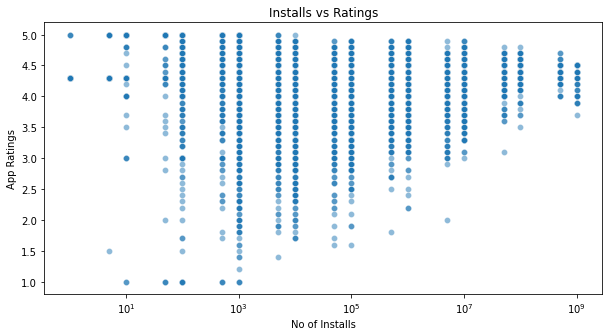

In [164]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=dt["Installs"],y=dt["Rating"],alpha=0.5)
plt.title("Installs vs Ratings")
plt.xscale("log")

plt.xlabel("No of Installs")
plt.ylabel("App Ratings")
plt.show() # strong correlation between installs and ratings.

Q.12 Do paid apps generate more installs than free apps?

In [168]:
free_installs=dt[dt["Type"]=="Free"]["Installs"].mean()
paid_installs=dt[dt["Type"]=="Paid"]["Installs"].mean()
print(f"Average Installs of free Apps:{free_installs:.2f}")
print(f"Average Installs of Paid Apps:{paid_installs:.2f}")


Average Installs of free Apps:15279679.80
Average Installs of Paid Apps:90491.35


Q.13 Are expensive apps rated higher than free apps?

<function matplotlib.pyplot.show(close=None, block=None)>

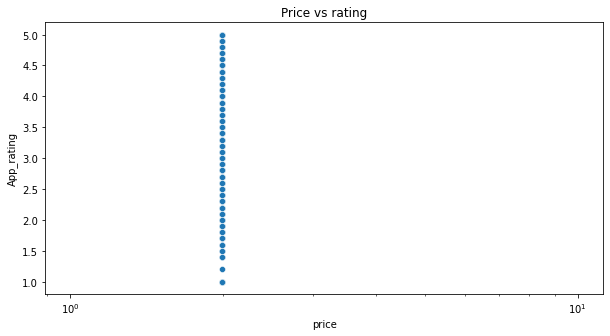

In [185]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=dt["Price"],y=dt["Rating"])
plt.title("Price vs rating")
plt.xscale("log")
plt.xlabel("price")
plt.ylabel("App_rating")

plt.show

Q.14 which categories have the most paid apps?(Categorical vs categorical)

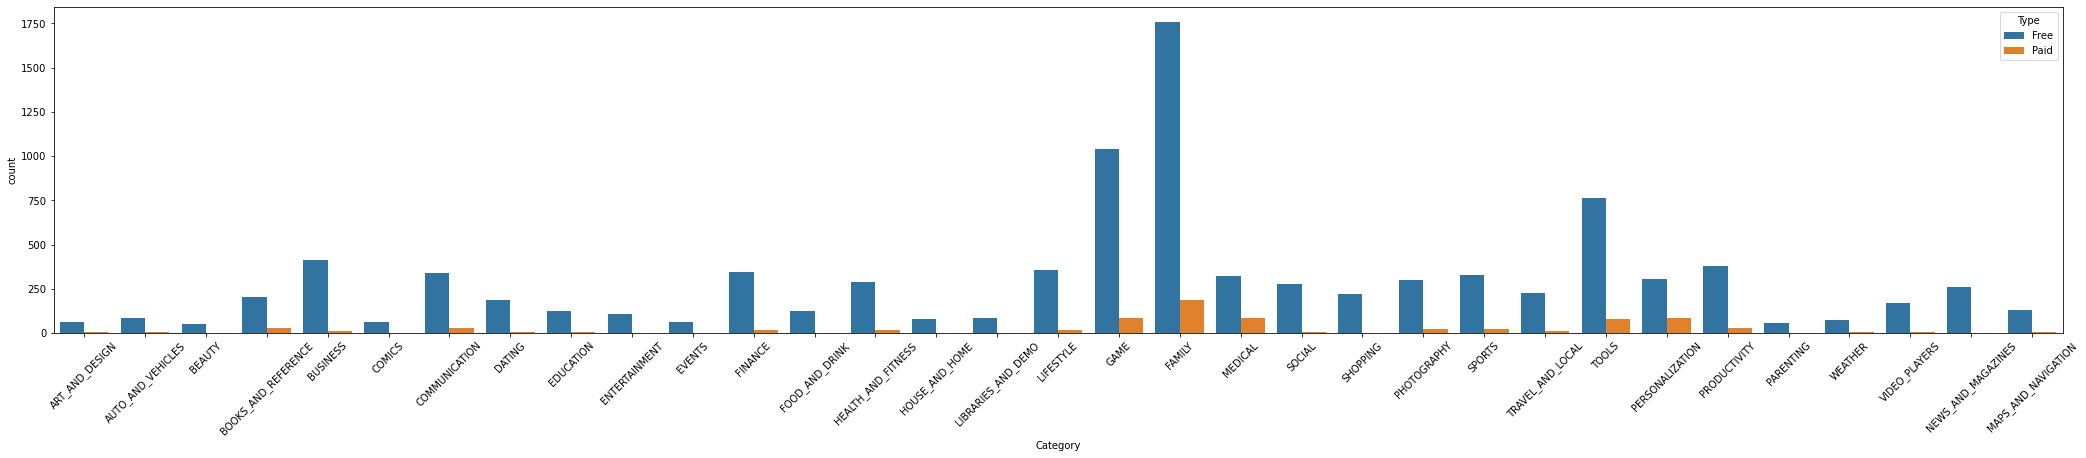

In [175]:
plt.figure(figsize=(36,6))
sns.countplot(x="Category",hue="Type",data=dt)
plt.xticks(rotation=45)
plt.show()

# Thank you 